# **<center>Bezier-Kurven</center>**

In diesem folgenden Dokument werden die Mathematischen Attribute der Quadratischen und der Kubischen Bezier Kurve aufgezeigt und grafisch dagestellt.

# Problemlösung

## Aufgabe 1:
Manuel Schmidbauer

Vorerst wurde eine QuadraticBezier Klasse, welche die gewünschte Funktion für die Kurve aufstellt und die nötigen Plots bereitstellt.
Die Verwendeten Formeln wurden von http://www.fachgruppe-computeralgebra.de/data/JdM-2008/Sonderheft.pdf (S. 11) entnommen und zusammen in eine Kurvenformel gepackt.

In [214]:
class QuadraticBezier:
    """
    Implementation of a quadratic bezier curve
    :author Manuel Schmidbauer:
    """
    
    def __init__(self, A, B, C):
        """
        Creates a new quadratic bezier curve
        :param A: vector representing the start point
        :param B: vector representing the control point
        :param C: vector representing the end point
        """
        t = var('t')
        
        self.A = A
        self.B = B
        self.C = C
        
        # Functions for the points D and E
        D = A + t*(B - A)
        E = B + t*(C - B)
        
        # Function for the final curve
        self.curve = D + t * (E - D)
    
    def get_plot(self):
        curve_plot = parametric_plot((self.curve[0], self.curve[1]), 
                                     (0, 1),
                                     color='blue',
                                     thickness=2,
                                     zorder=0)
        points_plot = points([self.A, self.B, self.C], 
                             size=50,
                             color='red',
                             zorder=2)
        lines_plot = line([self.A, self.B, self.B, self.C], 
                          color='green',
                          zorder=1)    
        return curve_plot, points_plot, lines_plot

Zudem ein kleines Test Programm

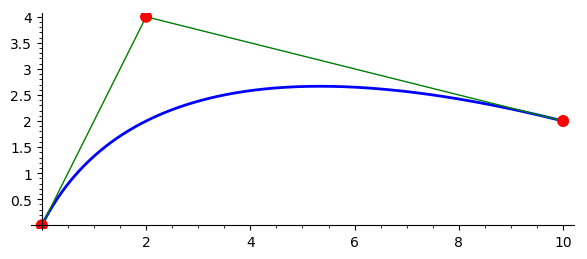

In [215]:
curve = QuadraticBezier(vector([0, 0]), vector([2, 4]), vector([10, 2]))
plots = curve.get_plot()
show(plots[0] + plots[1] + plots[2])

## Aufgabe 2:  
Andreas Hager

Zur Klärung der Aufgabenstellung haben wir die Quelle http://www.fachgruppe-computeralgebra.de/data/JdM-2008/Sonderheft.pdf (2008, S. 9-11) zu Rate gezogen. 

Aus dieser Quelle habe ich die Idee fuer den Algorithmus zum erstellen von Bezier-Kurven vom Grad 2, welchen ich auf kubische Kurven erweitert habe:

```
Seien A, B, C, D element RxR  
Strecken AB, BC, CD  
Sei E element RxR ein Punkt auf der Strecke AB  
Sei t element R  
Wähle t so das t = AE / AD  
      => t element [0, 1]  
Wähle F, G, H, I, J element RxR,  
    so dass gilt:  
       F = B + t*BC  
       G = C + t*CD  
       H = E + t*EF  
       I = F + t*FG  
       J = H + t*HI 
Der Punkt J wandert auf der Kurve.
```

In [240]:
class CubicBezier:
    """
    :author Andreas Hager:
    Diese Klasse repräsentiert eine Kubische Bezier-Kurve
    """
    
    def __init__(self, a, b, c, d):
        """initialisiert die Fixpunkte"""
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        
        t = var('t')
        assume(t >= 0)
        assume(t <= 1)
        
        self.e = self.a + t*(self.b - self.a)
        self.f = self.b + t*(self.c - self.b)
        self.g = self.c + t*(self.d - self.c)
        self.h = self.e + t*(self.f - self.e)
        self.i = self.f + t*(self.g - self.f)
        self.j = self.h + t*(self.i - self.h)

    def get_explicit_function(self):
        self.j[0] = self.j[0].full_simplify()
        self.j[1] = self.j[1].full_simplify()
        return self.j
    
    def get_curve(self, upTo=1):
        function = self.get_explicit_function()
        return parametric_plot((function[0], function[1]), (0, upTo), color='blue', thickness=2, zorder=0)
    
    def get_animation(self, steps):
        """Aufgabe 3"""
        plot = self.draw_base_lines()
        
        list = [self.e, self.f, self.g, self.h, self.i, self.j]

        sines = [self.list_plot_points(list, counter/(steps+2)) + 
                 plot + self.draw_lines(list, counter/(steps+2)) + 
                 self.get_curve(counter/(steps+2)) for counter in range(1, steps+1)]
        animation = animate(sines)
        
        return animation
    
    def draw_base_lines(self):
        punkte = [self.a, self.b, self.c, self.d]
        # plot = list_plot(punkte, color='green', pointsize=30, figsize=6)
        plot = line([self.a, self.b], color='green', thickness=2, zorder=1)
        plot += line([self.b, self.c], color='green', thickness=2, zorder=1)
        plot += line([self.c, self.d], color='green', thickness=2, zorder=1)
        return plot
        
    
    def draw_lines(self, list, value=1):
        plot = line([(list[0][0](value), list[0][1](value)), (list[1][0](value), list[1][1](value))], color='green', thickness=1, zorder=1)  
        plot += line([(list[1][0](value), list[1][1](value)), (list[2][0](value), list[2][1](value))], color='green', thickness=1, zorder=1)
        plot += line([(list[3][0](value), list[3][1](value)), (list[4][0](value), list[4][1](value))], color='green', thickness=1, zorder=1)
        return plot
    
    def get_full_plot(self):
        plot = self.get_curve()
        plot += self.draw_base_lines()
        plot += list_plot([self.a, self.b, self.c, self.d], size=50, color='red', zorder=2)
        return plot
    
    def get_points(self):
        return self.a, self.b, self.c, self.d
        
    def list_plot_points(self, list, value=1):
        return list_plot([(list[i][0](value), list[i][1](value))  for i in range(len(list))], size=50, color='red', zorder=2)
        

## Aufgabe 3:
Andreas Hager

-139*t^3 + 225*t^2 - 99*t + 5

26*t^3 - 108*t^2 + 81*t + 1

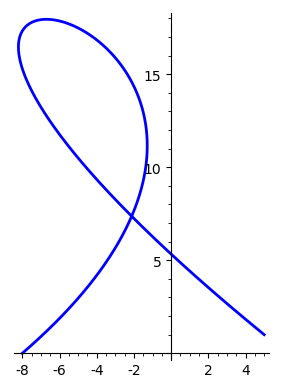

/home/manuel/HDD/SageMath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:42: DeprecationWarning: Substitution using function-call syntax and unnamed arguments is deprecated and will be removed from a future release of Sage; you can use named arguments instead, like EXPR(x=..., y=...)
See http://trac.sagemath.org/5930 for details.


Animation with 40 frames
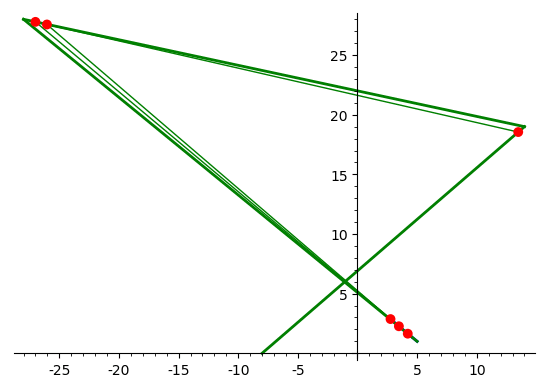

In [241]:
a = vector([5, 1])
b = vector([-28, 28])
c = vector([14, 19])
d = vector([-8, 0])


cubic = CubicBezier(a, b, c, d)

function = cubic.get_explicit_function()
pretty_print(function[0])
pretty_print(function[1])

plot = cubic.get_curve()
show(plot)

steps = 40
animation = cubic.get_animation(steps)
show(animation)
animation.gif(savefile='bezier_animation.gif', delay=35, iterations=3)

## Aufgabe4:
Andreas Hager

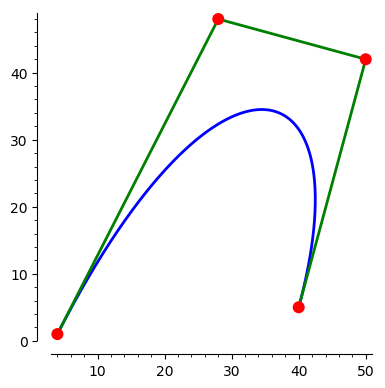

In [232]:
p1 = vector([4, 1])
p2 = vector([28, 48])
p3 = vector([50, 42])
p4 = vector([40, 5])

cubic = CubicBezier(p1, p2, p3, p4)

show(cubic.get_full_plot())

Die Mittleren Punkte geben an, wie weit die Kurve in die ebene, wie mit einem Gumiband verbunden, gezogen wird.

## Aufgabe 5:
Andreas Hager

In [16]:
# Aufstellen einer algemeinen kubischen Bezier-Kurve,
# mit den Punkten P_1, P_2, P_3, P_4, welche durch die Vectoren p1, p2, p3, p4
# dargestellt werden.
p1x, p2x, p3x, p4x = var('p1x, p2x, p3x, p4x')
p1y, p2y, p3y, p4y = var('p1y, p2y, p3y, p4y')
p1 = vector([p1x, p1y])
p2 = vector([p2x, p2y])
p3 = vector([p3x, p3y])
p4 = vector([p4x, p4y])
cubic = CubicBezier(p1, p2, p3, p4)

# Allgemeine algebraische darstellung der Kurve
function = cubic.get_explicit_function()

# Ableitund der Kurve
dFunction = vector([diff(function[0], t), diff(function[1], t)])

# Einsetzen des wertes 0 in die Ableitung 
# => wir haben den Steigungsvector an dem Punkt P_1
dSubs0Vector = vector([dFunction[0].substitute(t=0), dFunction[1].substitute(t=0)])
# mit dieser Logischen gleichheit ist gezeigt, dass der Steigungsvector
# ein vielfaches der Strecke P_1P_2 = P_2 - P_1 ist.
print(dSubs0Vector == 3*(p2 - p1))
# => Die Kurventangente in P_1 geht durch P_2

# Einsetzen des wertes 1 in die Ableitung 
# => wir haben den Steigungsvector an dem Punkt p4
dSubs1Vector = vector([dFunction[0].substitute(t=1), dFunction[1].substitute(t=1)])
# mit dieser Logischen gleichheit ist gezeigt, dass der Steigungsvector
# ein vielfaches der Strecke P_3P_4 = P_4 - P_3 ist.
print(dSubs1Vector == 3*(p4 - p3))
# => Die Kurventangente in P_4 geht durch P_3

True
True


# Aufgabe 6:
Manuel Schmidbauer

Bei der Aufgabe 6 sollte ein C mit hilfe von einer Bezier Kurve erstellt werden.
Hierfür wurden die Punkte:
A = (3,-5)
B = (-3,-5)
C = (-3, 5)
D = (3, 5)
gewählt, um eine schönes C zu erschaffen, welches sich um den Koordiantenursprung bildet.

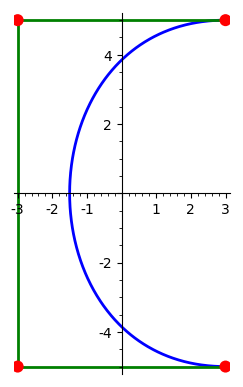

In [233]:
c = CubicBezier(vector([3, -5]), vector([-3, -5]), vector([-3, 5]), vector([3, 5]))
show(c.get_full_plot())

## Aufgabe 7:
Manuel Schmidbauer

Um einen glatten Übergang zwischen zwei Bezierkurven zu erschaffen muss die Steigung der beiden Funktionen am Übergangspunkt gleich sein.
Um dies sicherzustellen müssen spezielle Bedingungen für die Kontrollpunkte bestehen.
Man nehme an, die beiden Kurven bestehen aus den Kontrollpunkten A, B, C, D und E, F, G, wobei der Punkt D der Übergangspunkt ist und somit in beiden Kurven enthalten ist.  
Dann muss für die Punkte C, D, E gelten, dass jeweils die der Vektoren CD und DE die gleiche Steigung haben.

In [234]:
def get_gradient_at_t(cubic, current_t):
    """
    Calculates the gradient at the given point current_t using the limit function
    :param cubic: a CubicBezier object
    :param current_t: a value between 0 and 1 
    """
    function = cubic.get_explicit_function()
    diff = function[1] / function[0]
    return limit(diff, t=current_t)

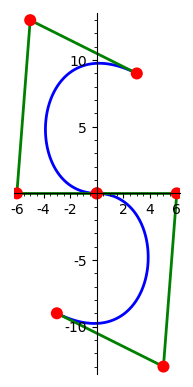

The gradient at the transition is THE SAME


In [235]:
A = vector([3, 9])
B = vector([-5, 13])
C = vector([-6, 0])
D = vector([0, 0])
E = vector([6, 0])
F = vector([5, -13])
G = vector([-3, -9])

# Creating two CubicBezier Curves with the shared point D
upper_curve = CubicBezier(A, B, C, D)
lower_curve = CubicBezier(D, E, F, G)

# Printing the curves
show(upper_curve.get_full_plot() + lower_curve.get_full_plot())

# Checking if the to have the same gradient at the transition
same_gradient = bool(get_gradient_at_t(upper_curve, 1) == get_gradient_at_t(lower_curve, 0))
same_statement = "THE SAME" if same_gradient else "NOT THE SAME"
print("The gradient at the transition is " + same_statement)

Hierbei ist es wichtig, das die Punkte A und G keinen Einfluss auf den Übergang haben!

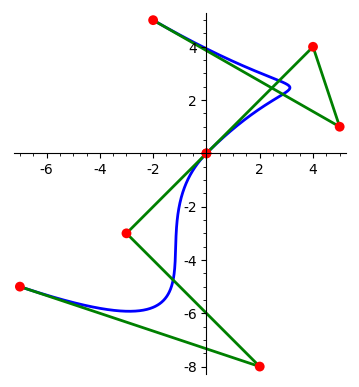

The gradient at the transition is THE SAME


In [242]:
import random

# The same example, but with random values for A, B, F and G
A = vector([random.randrange(-10, 10), random.randrange(0, 10)])
B = vector([random.randrange(-10, 10), random.randrange(0, 10)])

# Additionally the lenght of CD and DE is random
c_length = random.randrange(1, 5)
e_length = random.randrange(1, 5)

C = vector([c_length, c_length])
D = vector([0, 0])
E = vector([-e_length, -e_length])
F = vector([random.randrange(-10, 10), random.randrange(-10, 0)])
G = vector([random.randrange(-10, 10), random.randrange(-10, 0)])

# Creating two CubicBezier Curves with the shared point D
upper_curve = CubicBezier(A, B, C, D)
lower_curve = CubicBezier(D, E, F, G)

# Printing the curves
show(upper_curve.get_full_plot() + lower_curve.get_full_plot())

# Checking if the to have the same gradient at the transition
same_gradient = bool(get_gradient_at_t(upper_curve, 1) == get_gradient_at_t(lower_curve, 0))
same_statement = "THE SAME" if same_gradient else "NOT THE SAME"
print("The gradient at the transition is " + same_statement)

## Aufgabe 8 und 9:
Manuel Schmidbauer

Nun sollen mehrere Kurven aneinandere gefügt werden und somit ein schöner Weg aus Kurven entstehen. Hierzu wurde eine neue Klasse CubicBezierPath defeniert, welches solch einen Weg dastellt.  
Intern wird eine Liste aus CubicBezier Kurven gespeichert, welche jeweils gemeinsame Punkte haben und zusammen geplotted werden. Gemeinsam haben sie den Übergangspunkt D welcher durch einen neuen Punkt ergänzt wird. Dieser ist der negative Vektor DC addiert auf D, wodurch dieser Vektor um den Punkt D gespiegelt wird.

In [243]:
class CubicBezierPath:
    """
    A path of several cubic Bezier Curves with a smooth transition each
    """
    
    def __init__(self, base_curve):
        """
        Creates a new path from a base curve
        :param base_curve: the base cubicBezier curve
        """
        self.cubic_curves = [base_curve]
        
    def add_points(self, new_points):
        """
        Adds a array of new points to the curve
        :param new_points: [(A,B), (C,D), ...] a list of 2er tuples
        """
        for new_point in new_points:
            C, D = self.cubic_curves[-1].get_points()[-2:]
            new_curve = CubicBezier(D, D - (C-D), new_point[0], new_point[1])
            self.cubic_curves.append(new_curve)
        
    def get_full_plot(self):
        return_plot = self.cubic_curves[0].get_full_plot()
        if len(self.cubic_curves) > 1:
            for cubic_curve in self.cubic_curves[1:]:
                return_plot += cubic_curve.get_full_plot()
        return return_plot

Zudem wird eine Funktion defeniert welche aus sechs gegeben Punkten eben solch einen Weg generiert.

In [238]:
def generate_path_from_6_points(A, B, C, D, E, F):
    """
    Generates a new CubicBezierPath from 6 points
    """
    curve_path = CubicBezierPath(CubicBezier(A, B, C, D))
    curve_path.add_points([(E, F)])
    return curve_path

Im weiteren wird das oben bereits generierte S nun mit einem CubicBezierPath dargestellt.  
Zu diesem werden außerdem noch weiter Punkte addiert.

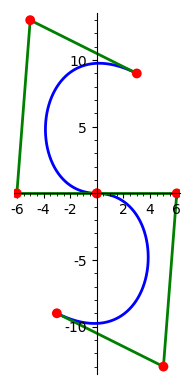

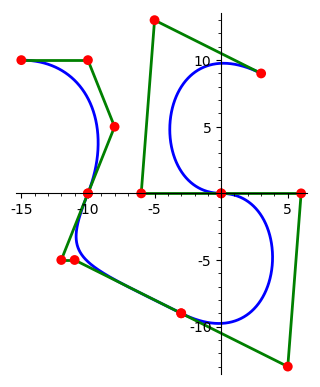

In [244]:
A = vector([3, 9])
B = vector([-5, 13])
C = vector([-6, 0])
D = vector([0, 0])

E = vector([5, -13])
F = vector([-3, -9])

# Creates the 'S' as a path of cubicBezierCurves
curve_path = generate_path_from_6_points(A, B, C, D, E, F)
show(curve_path.get_full_plot())

# Adds a additional test point
curve_path.add_points([(vector([-12, -5]), vector([-10, 0])), (vector([-10, 10]), vector([-15, 10]))])
show(curve_path.get_full_plot())